In [1]:
print('hello world')

hello world


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/Colab Notebooks/second project/car_img-test.zip"


'/content/drive/My Drive/Colab Notebooks/second project/car_img-test.zip'


In [4]:
import zipfile
import os

# Define paths to your zip files
zip_files = [
    "/content/drive/My Drive/Colab Notebooks/second project/car_img-test.zip",
    "/content/drive/My Drive/Colab Notebooks/second project/car_img-validation.zip",
    "/content/drive/My Drive/Colab Notebooks/second project/plate_image_with_dummy-train.zip"
]

# Create an output directory
output_dir = "/content/dataset"
os.makedirs(output_dir, exist_ok=True)

# Extract all zip files
for zip_path in zip_files:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)
        print(f"Extracted: {zip_path}")

# Verify extracted content
!ls "/content/dataset"


Extracted: /content/drive/My Drive/Colab Notebooks/second project/car_img-test.zip
Extracted: /content/drive/My Drive/Colab Notebooks/second project/car_img-validation.zip
Extracted: /content/drive/My Drive/Colab Notebooks/second project/plate_image_with_dummy-train.zip
test  train  validation


In [10]:
import os

# Define dataset directories
base_path = "/content/dataset"  # Change this if files are elsewhere

# Define paths for car images
train_images_path = os.path.join(base_path, "test")
validation_images_path = os.path.join(base_path, "validation")

# Define path for plate images (used for OCR training)
plate_images_path = os.path.join(base_path, "train")

# Check files inside each folder
print("Test Images:", len(os.listdir(train_images_path)))
print("Validation Images:", len(os.listdir(validation_images_path)))
print("Plate Images:", len(os.listdir(plate_images_path)))


Test Images: 8352
Validation Images: 4240
Plate Images: 90938


In [12]:
# Store image filenames
train_images = sorted(os.listdir(train_images_path))
validation_images = sorted(os.listdir(validation_images_path))
plate_images = sorted(os.listdir(plate_images_path))

# Print few samples
print("Test Image Samples:", train_images[:5])
print("Validation Image Samples:", validation_images[:5])
print("Plate Image Samples:", plate_images[:5])


Test Image Samples: ['day_00010.jpg', 'day_00010.xml', 'day_00019.jpg', 'day_00019.xml', 'day_00026.jpg']
Validation Image Samples: ['day_00004.jpg', 'day_00004.xml', 'day_00011.jpg', 'day_00011.xml', 'day_00018.jpg']
Plate Image Samples: ['00001.jpg', '00001.xml', '00002.jpg', '00002.xml', '00004.jpg']


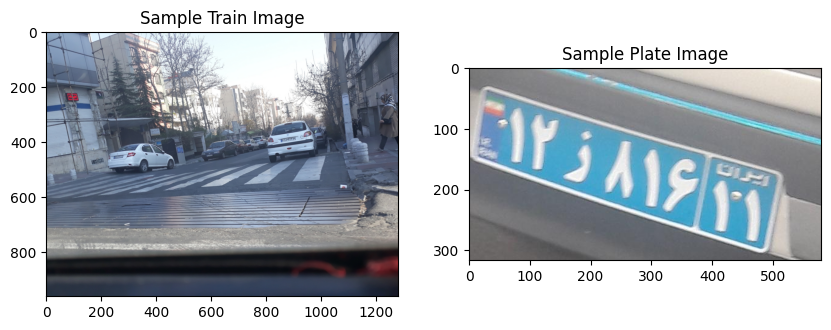

In [14]:
import cv2

# Load a sample test image
sample_train_image = cv2.imread(os.path.join(train_images_path, train_images[0]))
sample_plate_image = cv2.imread(os.path.join(plate_images_path, plate_images[0]))

# Convert to RGB (for proper visualization)
sample_train_image = cv2.cvtColor(sample_train_image, cv2.COLOR_BGR2RGB)
sample_plate_image = cv2.cvtColor(sample_plate_image, cv2.COLOR_BGR2RGB)

# Show the images
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(sample_train_image)
plt.title("Sample Train Image")

plt.subplot(1,2,2)
plt.imshow(sample_plate_image)
plt.title("Sample Plate Image")

plt.show()
